In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## <span style='background :lightblue' >1. Introduction to Statsmodels </span>

<div class = "alert alert-success"> <span style='color:black' >  Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. </span></div>

In [3]:
df = pd.read_csv(r"macrodata.csv" , index_col = 0 ,parse_dates = True)

In [4]:
df.shape

(203, 14)

In [5]:
df.head(2)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74


In [6]:
df.tail(2)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
2009-09-30,2009,3,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    int64  
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 23.8 KB


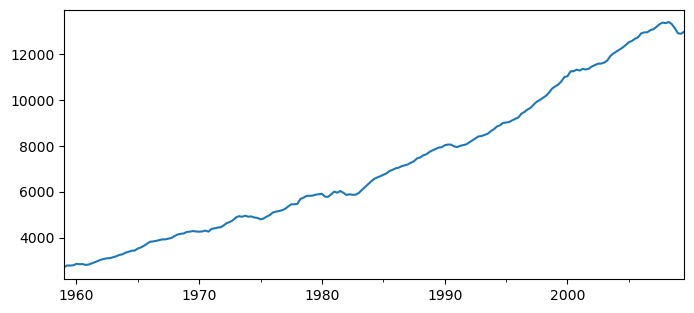

In [11]:
# Example 1 : plotting 'realgdp' versus time line plot

df['realgdp'].plot(kind = 'line' , figsize = (8,3.5))
plt.show()

In [12]:
# Example2 : 

from statsmodels.tsa.filters.hp_filter import hpfilter

## <span style='background :lightblue' >2. Hodrick-Prescott Filter </span>

<div class = "alert alert-success"><span style='color:black' The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$.
</span><br>
<span style='color:blue'>$y_t = \tau_t + c_t$ </span>
</div>

- <span  style = 'background-color:lightgreen'> Separating the 'trend-comp' and 'cyclical-comp' from the 'realgdp' data using "hodrick-prescott" filter or hpfilter </span>

In [13]:
# lamb = 1600 for quaterly data

gdp_cycle , gdp_trend = hpfilter(df['realgdp'] , lamb = 1600)

In [16]:
# Plotting the trend componenet : to see whether the 'realgdp'  is increasing, decreasing or 
#                                 is combination of both with time

df['gdp_trend']  = gdp_trend
df.head(2)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdp_trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468


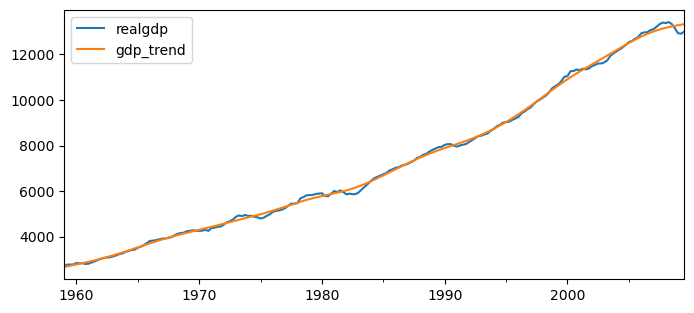

In [18]:
df[['realgdp' , 'gdp_trend']].plot(kind = 'line' , figsize = (8,3.5))
plt.show()

In [22]:
# Slicing time 2005 onwards

df_2005 = df[['realgdp' , 'gdp_trend']].loc['2005':]
df_2005.head(3)

,realgdp,gdp_trend
2005-03-31,12534.113,12495.042715
2005-06-30,12587.535,12568.882010
2005-09-30,12683.153,12640.354965


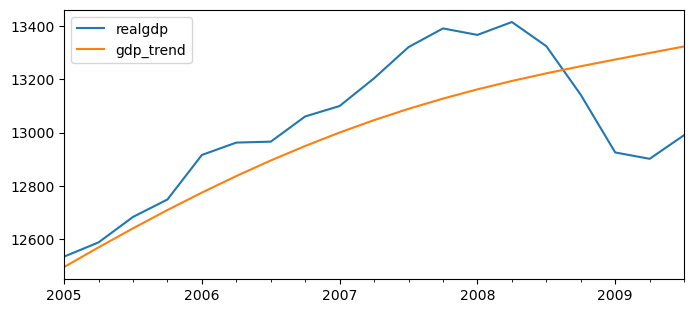

In [20]:
df_2005.plot(kind = 'line' , figsize = (8,3.5))
plt.show()